In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Read Dataset
df=pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
#check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
#check duplicates
df.duplicated().sum()

0

In [10]:
#check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
## Check unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [17]:
##Descriptive statitics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
#Seggregate numerical and catergorial feature

In [26]:
catergorial_features=[feature for feature in df.columns if df[feature].dtype=='O']
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [27]:
catergorial_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [28]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [30]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [31]:
#Aggreate total score with mean
df['total score']=df["math_score"]+df['reading_score']+df['writing_score']
df['average']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
## More visulaization

<AxesSubplot: xlabel='average', ylabel='Count'>

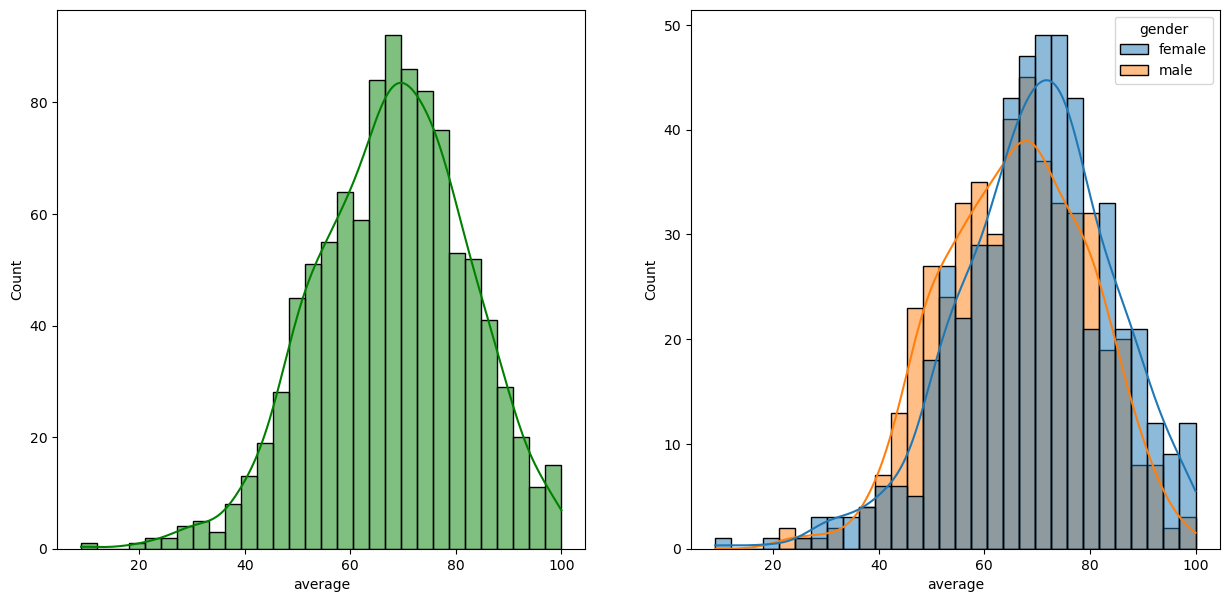

In [40]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g',hue='gender')

In [42]:
#Insights : Female students tends to perform well than male students

/tmp/ipykernel_775/3738854496.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/tmp/ipykernel_775/3738854496.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/tmp/ipykernel_775/3738854496.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<AxesSubplot: xlabel='average', ylabel='Count'>

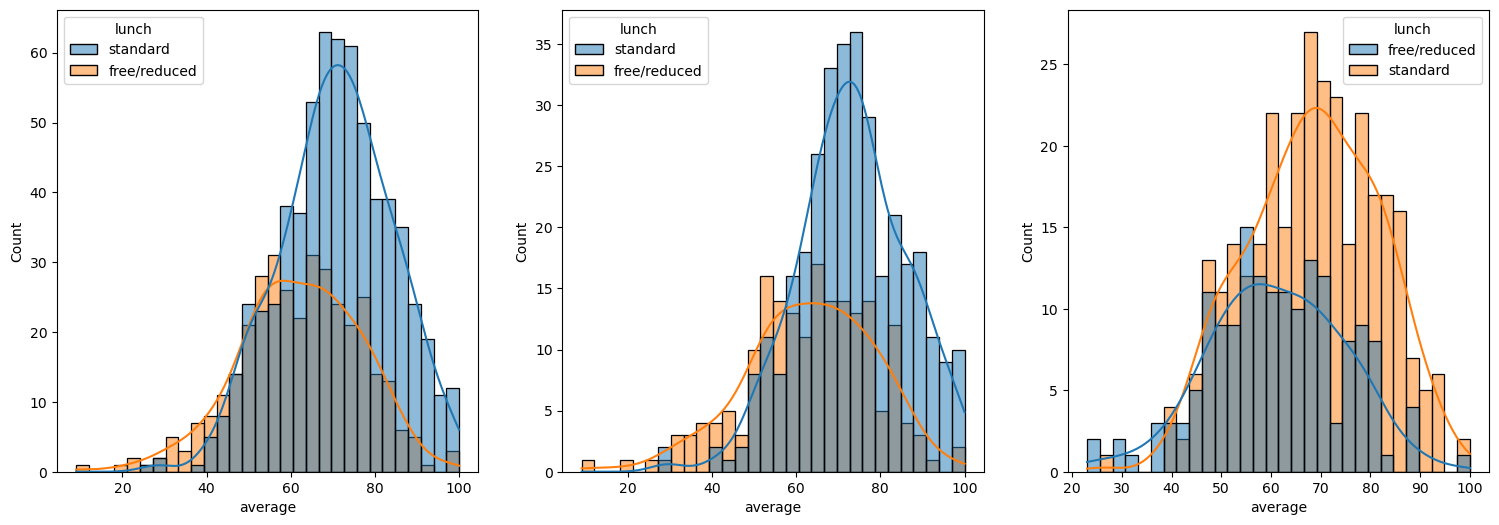

In [48]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,color='g',hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,color='g',hue='lunch')

In [49]:
#Insights = Standard lunch helps to perform better in exam